**ФИО:** Смольков Максим Дмитриевич

**Группа:** 25152

# **Реконструкция филогенетического дерева:**

Входные данные:

Матрица попарных расстояний между набором таксонов-последовательностей.

Каждый объект матрицы изначально является отдельным кластером.

Например, передаем следующую матрицу:

```
0
1  0
2  1  0
3  2  2  0
1  2  3  3  0
```
Что делает алгоритм:

Итеративно объединяет два ближайших кластера, вычисляя новое расстояние между новым кластером и всеми остальными кластерами.
На каждом шаге обновляет матрицу расстояний с учетом нового кластера.

На выходе имеем:

Филогенетическое дерево (дендрограмма) в формате Newick.
Формат должен быть следующим:
```
'(rsz:1.3125,(crb:1.125,(csat:0.75,(ath:0.5,aly:0.5):0.25):0.375):0.1875)'
```

Это дерево будет выглядеть так:


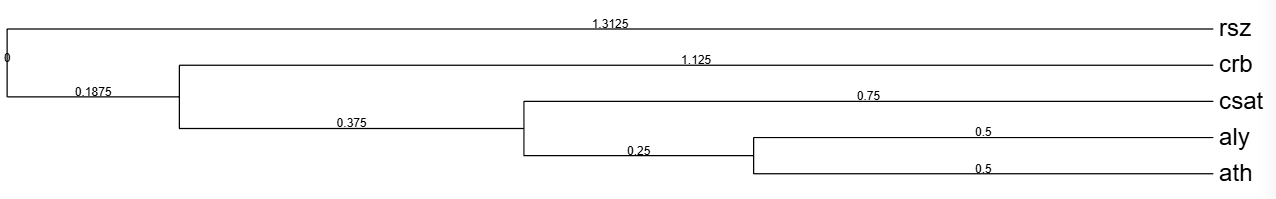

# Реализация функции:

In [3]:
import numpy as np

def find_min_pair(D):
    n = len(D)
    min_val = np.inf
    min_pair = (0, 0)
    for i in range(n):
        for j in range(i + 1, n):
            if D[i, j] < min_val:
                min_val = D[i, j]
                min_pair = (i, j)
    return min_pair


def dendrogram(matrix, labels):
    n = len(matrix)

    # Восстанавливаем матрицу на случай, если подавалась нижнетреугольная
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1):
            D[i, j] = matrix[i][j]
            D[j, i] = matrix[i][j]

    # Высоты кластеров
    heights = {label: 0.0 for label in labels}

    # Алгоритм (UPGMA)
    while len(D) > 1:
        # Находим два ближайших кластера
        i, j = find_min_pair(D)
        ci, cj = labels[i], labels[j]
        dist = D[i, j] / 2

        # Создаем новое имя в формате Newick
        new_label = f"({ci}:{dist - heights[ci]},{cj}:{dist - heights[cj]})"
        heights[new_label] = dist

        # Вычисляем новое расстояние до других кластеров
        new_row = (D[i, :] + D[j, :]) / 2
        new_row = np.delete(new_row, [i, j])

        # Обновляем матрицу расстояний
        D = np.delete(D, [i, j], axis=0)
        D = np.delete(D, [i, j], axis=1)
        D = np.vstack((D, new_row))
        new_col = np.append(new_row, [0.0])
        D = np.column_stack((D, new_col))

        # Обновляем метки
        labels = [lab for k, lab in enumerate(labels) if k not in (i, j)] + [new_label]

    return labels[0] + ";"


# Применение функции:

In [4]:
matrix = [
    [0],
    [1, 0],
    [2, 1, 0],
    [3, 2, 2, 0],
    [1, 2, 3, 3, 0]
]

matrix_full = [
    [0, 1, 2, 3, 1],
    [1, 0, 1, 2, 2],
    [2, 1, 0, 2, 3],
    [3, 2, 2, 0, 3],
    [1, 2, 3, 3, 0]
]

newick_string = dendrogram(matrix, labels=["ath", "aly", "csat", "crb", "rsz"])
print(newick_string)


(rsz:1.3125,(crb:1.125,(csat:0.75,(ath:0.5,aly:0.5):0.25):0.375):0.1875);


Визуализация дерева

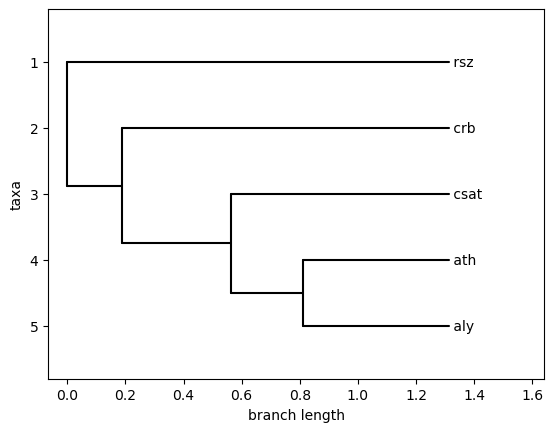

In [5]:
from Bio import Phylo
from io import StringIO
import matplotlib.pyplot as plt

tree = Phylo.read(StringIO(newick_string), "newick")
Phylo.draw(tree)